# Heun's Method

In [3]:
import numpy as np

import matplotlib.pyplot as plt

- Wikipedia: [Heun's Method](https://en.wikipedia.org/wiki/Heun%27s_method)

In mathematics and computational science, the Euler method is a numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. Heun's method is often described as the improved Euler's method.

Let $I = [t_a, t_b]$ be an interval of $\mathbb{R}$ and $f$ a real function defined on $I \times \mathbb{R}$.

$$
\left\{
    \begin{array}{ll}
        \forall t \in I, y'(t) = f(t, y(t)) \\
        y_a = y(t_a)
    \end{array}
\right.
$$

Heun's method gives an approximate solution at $n$ evenly separated points $\{x_i\}_{i \in \{0,n\}}$ of $I$ defined in this way: $x_i = a + i\frac{b-a}{n}$.

These values are noted $\{y_i\}_{i \in \{0,n\}}$.

The first step in heun's method consists in using the explicit Euler method relying on the approximation of the derivative:

$$
y'(x_{i}) \approx \frac{y(x_{i+1}) - y(x_{i})}{x_{i+1} - x_{i}}, \forall i \in {0, n-1}
$$

The previous problem becomes:

$$
\tilde{y}_{i+1} = y_{i} + (x_{i+1} - x_{i})f(x_{i}, y_{i}), \forall i \in {0, n-1}
$$

Notice that we get $\tilde{y}_{i+1}$ and not $y_{i+1}$. $\tilde{y}_{i+1}$ is an approximation of $y_{i+1}$.

The second part of Heun's method uses $\tilde{y}_{i+1}$ to compute a more precise $y_{i+1}$ thanks to the following expression:

$$
y_{i+1} = y_{i} + \frac{x_{i+1} - x_{i}}{2} \left[ f(t_{i}, y_{i}) + f(t_{i+1}, \tilde{y}_{i+1}) \right]
$$
$$
y_{i+1} = y_{i} + (x_{i+1} - x_{i}) \frac{\left[ f(t_{i}, y_{i}) + f(t_{i+1}, \tilde{y}_{i+1}) \right]}{2}
$$

In [4]:
def heun_method(i, n, f, y_0):
    """
    Heun's method.

    Parameters
    ----------
    i : List | Tuple
        Resolution interval
        Etample: [-1,1] 
    n : int
        Number of valuation points
    f : function
        Function f in the etpression of the ODE
    y_0 : float
        Initial value
    Returns
    -------
    List, List
        Valuation points, 
    """
    t = np.linspace(i[0], i[1], n)
    y_approx = [y_0]
    y = [y_0]

    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        y_approx.append(y[i] + h * f(t[i], y[i]))
        y.append(y[i] + (h/2) * (f(t[i], y[i]) + f(t[i+1], y_approx[i+1])))

    return t, y

In [5]:
i = [-1, 1]
n = 1000
d_y = lambda t: t*t
f = lambda t, y: 2*t
y_0 = 1

t, y = heun_method(i, n, f, y_0)
y_true = [d_y(t_i) for t_i in t]

mse = np.sum([(y_i - y_t)**2 for y_i, y_t in list(zip(y, y_true))])

Text(0.5, 1.0, 'MSE = 4.057662296030459e-29')

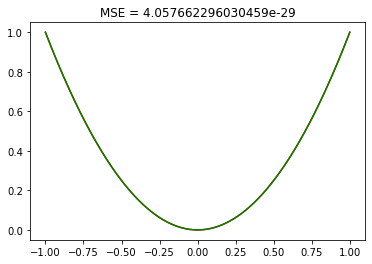

In [6]:
plt.plot(t, y, color="red")
plt.plot(t, y_true, color="green")
plt.title(f"MSE = {mse}")